# Image Generation with Autoencoders

Changning Liu 

## Abstract

This Jupyter Notebook is for applying Autoencoders (AEs) to a TMNIST Alphabet image dataset.

The dataset source is from Kaggle which contains Typography MNIST (TMNIST) with 94 characters and over 281,000 images along with their types (primary and secondary) as a .csv file.

In this notebook, it will implement Autoencoders (AEs) model to generate images


## Autoencoders

Autoencoders are neural networks that learn to efficiently compress and encode data then learn to reconstruct the data back from the reduced encoded representation to a representation that is as close to the original input as possible. Therefore, autoencoders reduce the dimentsionality of the input data i.e. reducing the number of features that describe input data.

Since autoencoders encode the input data and reconstruct the original input from encoded representation, they learn the identity function in an unspervised manner.

## Module Import and Prepare Images data

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
dataset = pd.read_csv("/Users/changningliu/Desktop/NEU Course/7370/94_character_TMNIST 2.csv")
X = dataset.drop({'labels','names'},axis=1)
y = dataset[['labels']]


In [10]:

train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.2)
train_labels =train_labels.values.reshape((-1,))
test_labels = test_labels.values.reshape((-1,))
train_images = train_images.values.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.values.reshape(test_images.shape[0], 28, 28, 1)
# normalization
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
# in order to make neural network train better, we set the value[-0.5 , 0.5]
train_images = (train_images/255) - 0.5
test_images = (test_images/255) - 0.5

print(train_images.shape) # 60000 training data
print(test_images.shape) # 10000 test data

(219274, 28, 28, 1)
(54819, 28, 28, 1)


## Define the Encoder 

In [11]:
#latent dim=32
image_width  = 28
image_height = 28
batch_size   = 128

input_img = layers.Input(shape=(image_width, image_height, 1))

# Save the shape into a variable for the decoder use.

x = layers. Flatten()(input_img)
encoded = layers. Dense(32,activation='relu')(x)

# Build the encoder
encoder = Model(input_img,encoded,name='encoder')

# 128-dimensional
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


## Define the Decoder

In [15]:
# Input shape for decoder
encoded_input =layers.Input(shape=(32,))
x = layers.Dense(784, activation='sigmoid')(encoded_input)
x = layers.Reshape((28,28))(x)
decoder = Model(encoded_input,x,name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28)            0         
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


## Define the Autoencoder

In [18]:
autoencoder = Model(input_img, decoder(encoder(input_img)),name="autoencoder")
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
h=autoencoder.fit(train_images, train_images,
                epochs=10,
                shuffle=True,
                validation_data=(test_images, test_images))

Epoch 1/10
6853/6853 [==============================] - 10s 1ms/step - loss: 0.2155 - val_loss: 0.2112
Epoch 2/10
6853/6853 [==============================] - 9s 1ms/step - loss: 0.2109 - val_loss: 0.2110
Epoch 3/10
6853/6853 [==============================] - 10s 2ms/step - loss: 0.2108 - val_loss: 0.2109
Epoch 4/10
6853/6853 [==============================] - 10s 1ms/step - loss: 0.2108 - val_loss: 0.2108
Epoch 5/10
6853/6853 [==============================] - 10s 1ms/step - loss: 0.2107 - val_loss: 0.2108
Epoch 6/10
6853/6853 [==============================] - 12s 2ms/step - loss: 0.2107 - val_loss: 0.2108
Epoch 7/10
6853/6853 [==============================] - 11s 2ms/step - loss: 0.2107 - val_loss: 0.2108
Epoch 8/10
6853/6853 [==============================] - 10s 1ms/step - loss: 0.2107 - val_loss: 0.2108
Epoch 9/10
6853/6853 [==============================] - 12s 2ms/step - loss: 0.2106 - val_loss: 0.2107
Epoch 10/10
6853/6853 [==============================] - 14s 2ms/step - lo

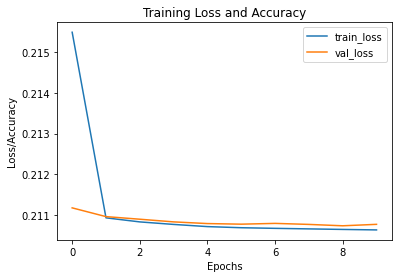

In [19]:
N = np.arange(0, 10)
plt.figure()
plt.plot(N, h.history['loss'], label='train_loss')
plt.plot(N, h.history['val_loss'], label='val_loss')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='upper right')

In [20]:
# Make predictions on the test set 
encoded_imgs = encoder(test_images).numpy()
decoded_imgs = decoder(encoded_imgs).numpy()

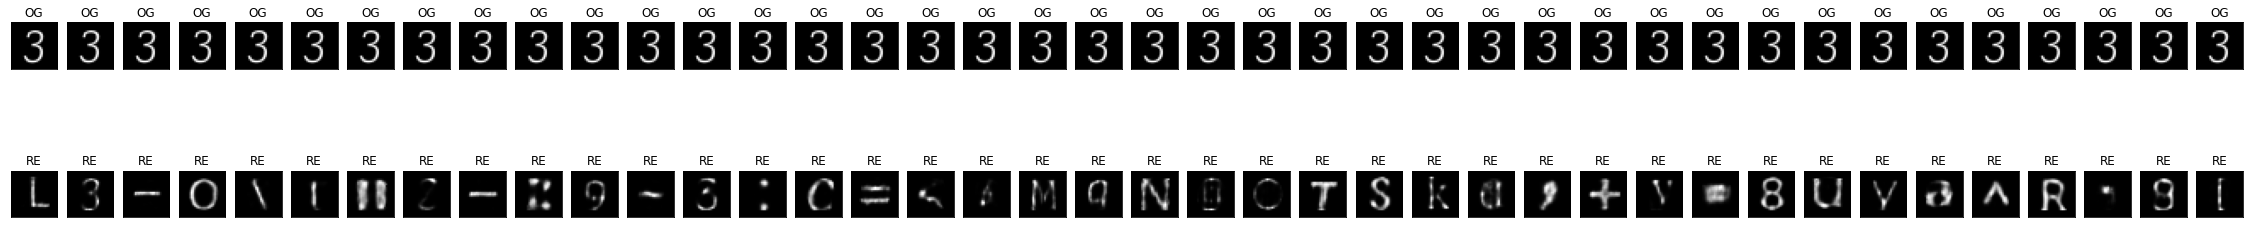

In [21]:
n = 40
plt.figure(figsize=(40, 5))

for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
 
  plt.imshow(test_images[1].reshape(28,28))
  plt.title("OG")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("RE")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

#### Adjust the size of the latent space and network

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                50240     
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 784)               50960     
______________________________________

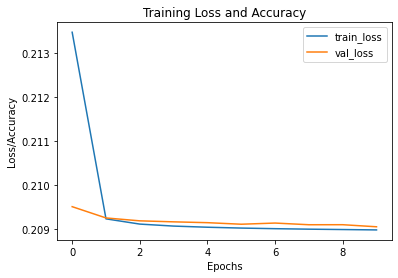

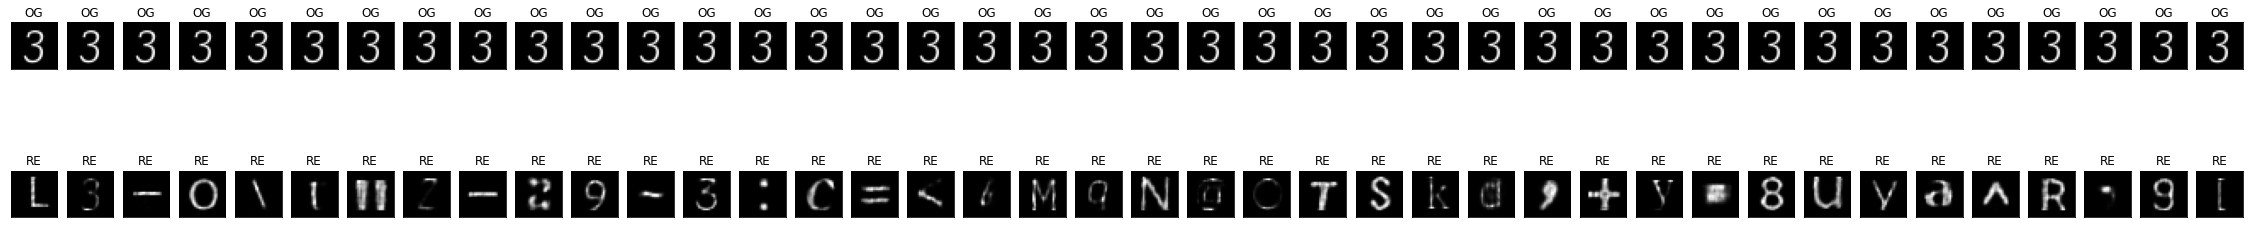

In [22]:
#latent dim=64
image_width  = 28
image_height = 28
batch_size   = 128

input_img = layers.Input(shape=(image_width, image_height, 1))

# Save the shape into a variable for the decoder use.

x = layers. Flatten()(input_img)
encoded = layers. Dense(64,activation='relu')(x)

# Build the encoder
encoder = Model(input_img,encoded,name='encoder')

# 128-dimensional
encoder.summary()
encoded_input =layers.Input(shape=(64,))
x = layers.Dense(784, activation='sigmoid')(encoded_input)
x = layers.Reshape((28,28))(x)
decoder = Model(encoded_input,x,name='decoder')
decoder.summary()
autoencoder = Model(input_img, decoder(encoder(input_img)),name="autoencoder")
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
h=autoencoder.fit(train_images, train_images,
                epochs=10,
                shuffle=True,
                validation_data=(test_images, test_images))
N = np.arange(0, 10)
plt.figure()
plt.plot(N, h.history['loss'], label='train_loss')
plt.plot(N, h.history['val_loss'], label='val_loss')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='upper right')
encoded_imgs = encoder(test_images).numpy()
decoded_imgs = decoder(encoded_imgs).numpy()
n = 40
plt.figure(figsize=(40, 5))

for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
 
  plt.imshow(test_images[1].reshape(28,28))
  plt.title("OG")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("RE")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

#### The second combination of network architecture and latent space size gives the best trade-off between compression and quality, we can know it from the data show 

# References

## Copyright and Licensing

BSD 3-Clause License

Copyright (c) 2022, Changning Liu All rights reserved.

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.